In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from graspy.plot import pairplot
%matplotlib inline

from pathlib import Path
import os
import re
import pandas as pd
import h5py

import numpy as np
from scipy import linalg,stats
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize

In [37]:
h5_key = 'latent'
## Define paths
basedir = Path('..')
datadir = basedir / 'data'
rawdir = datadir / 'raw'
gccadir = datadir / 'interim' / 'gcca_raw-True_param-10'
externaldir = datadir / 'external'

In [38]:
def get_files(path,
              level='(e|n)',
              subject='([0-9]{3})',
              task='(.+?)',
              filetype='h5',
              flag=''):
    files = []
    query = f'^{level}_sub-'
    query += f'{subject}_ses-1_'
    query += f'task-{task}{flag}\.{filetype}'
    for f in os.listdir(path):
        match = re.search(query, f)
        if match:
            files.append((f, match.groups()))
    
    return(files)

In [39]:
tasks = ['restingstate', 'openmonitoring', 'compassion']
levels = ['e', 'n']

latents = []
labels = []

n_components = 3

for level in levels:
    for task in tasks:
        paths = get_files(path=gccadir, level=level, task=task, flag='_gcca')
        
        n_load = len(paths)

        for path,subj in paths[:n_load]:
            h5f = h5py.File(gccadir / path,'r')
            latent = h5f[h5_key][:][:,:n_components]
            h5f.close()
            
            latents.append(latent)
            labels.append(f'{level}_{task}')
            
latents = np.array(latents)

In [40]:
latents_pca = latents.reshape(latents.shape[0],-1)

In [41]:
U,S,Vt =svds(latents_pca,6)

In [42]:
projs = latents_pca @ Vt.T

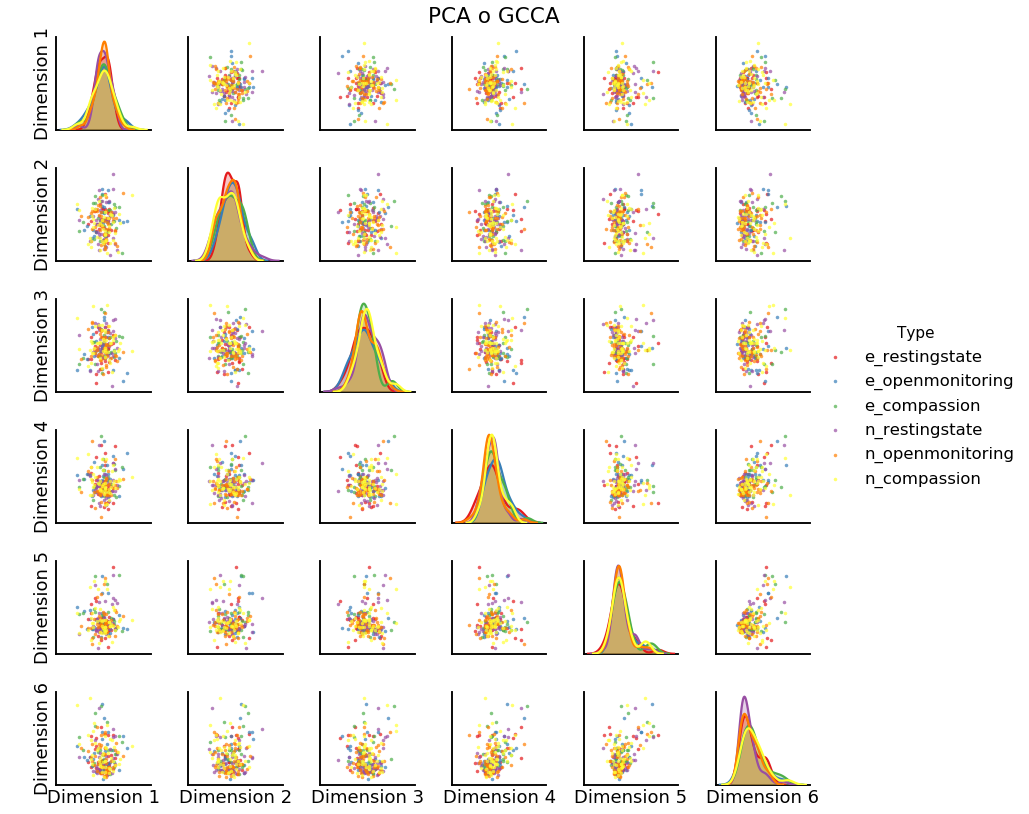

In [43]:
plot = pairplot(projs, labels,title=f'PCA o GCCA', palette='Set1',height=2)
#plt.savefig(basedir / 'reports' / 'lol' / f'pca_o_gcca_pairplot.png')